In [3]:
#Script used for generating the data set
#Errors added to the set for exercise purposes


#import random
#print(StudentID,Age,email,hrsStudy,FinalGrade)
#for i in range(50):
#    studId ="s" + str(random.randrange(10000,99999,1)) 
#    print(str(studId)+","+ str(random.randrange(19,35,1))+","+str(studId+"@oslomet.no"+","+str(random.randint(0, 12)))+","+str(random.randint(20, 100)))

In [21]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt

In [42]:
#Import csv file
url = 'C:\\Users\\krist\\Documents\\GitHub\\DAVE3625\\DAVE3625\\Lab1\\data\\stud.csv'

In [43]:
#Read the csv, notice sep=','.. For CSV files created in Norwegian excel we need to use sep=';'#
#df = pd.read_csv(url, na_values=' ') You can use this for automatically convert blank space to nan values
df = pd.read_csv(url, sep=',')

df.head()

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [45]:
df.isna().sum() #show missing values

StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [48]:
df=df.replace(r'^\s*$', np.nan, regex=True) #Replace blank values with np.nan values
df.isna().sum()

StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [49]:
df["Age"].replace(np.nan, 0, inplace=True)

In [50]:
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [52]:
# Remove dataset with missing data
df.dropna(inplace = True)
#Check sum
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    0
dtype: int64

In [54]:
df['Age'] = df['Age'].astype(str).astype(int) #Convert from obj to int
df['hrsStudy'] = df['hrsStudy'].astype(str).astype(int) #Convert from obj to int

<Axes: >

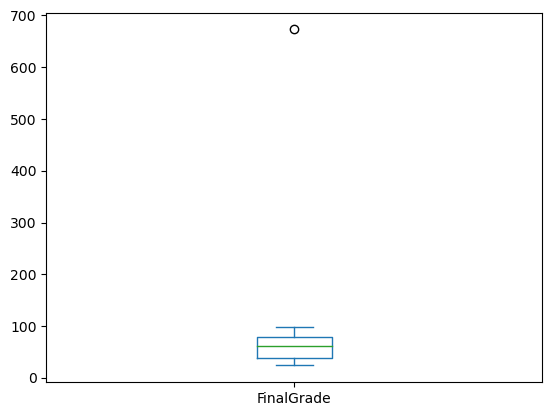

In [55]:
df["FinalGrade"].plot.box()

<Axes: >

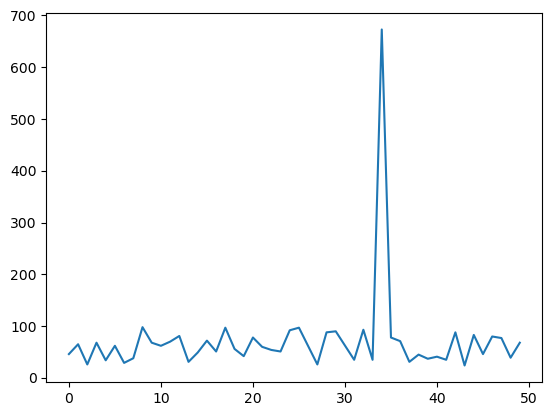

In [56]:
df["FinalGrade"].plot.line()

In [57]:
#Calculate the z score
z_scores = stats.zscore(df["FinalGrade"])
abs_z_scores = np.abs(z_scores)

In [58]:
#Drop all rows in the third quantile
df.drop(df[abs_z_scores > 3].index, inplace=True)

<Axes: >

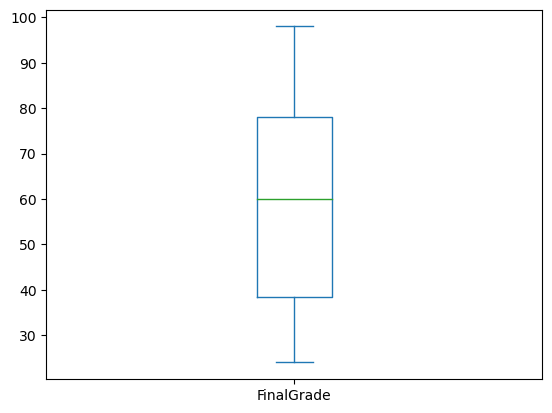

In [59]:
#Checking the column again to see if outliers are gone..
df["FinalGrade"].plot.box()

In [60]:
df.tail()

,StudentID,Age,email,hrsStudy,FinalGrade
45,62039,23,s62039@oslomet.no,4,46.0
46,42989,27,s42989@oslomet.no,0,80.0
47,85370,29,s85370@oslomet.no,2,77.0
48,63135,26,s63135@oslomet.no,9,39.0
49,28895,19,s28895@oslomet.no,10,68.0


In [61]:
df = df.reset_index(drop=True)
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade
42,62039,23,s62039@oslomet.no,4,46.0
43,42989,27,s42989@oslomet.no,0,80.0
44,85370,29,s85370@oslomet.no,2,77.0
45,63135,26,s63135@oslomet.no,9,39.0
46,28895,19,s28895@oslomet.no,10,68.0


In [62]:
# create a list of our conditions
conditions = [
    (df['FinalGrade'] <= 50.0),
    (df['FinalGrade'] > 50.0) & (df['FinalGrade'] <= 60.0),
    (df['FinalGrade'] > 60.0) & (df['FinalGrade'] <= 70.0),
    (df['FinalGrade'] > 70.0) & (df['FinalGrade'] <= 80.0),
    (df['FinalGrade'] > 80.0) & (df['FinalGrade'] <= 90.0),
    (df['FinalGrade'] > 90.0)
    ]

# create a list of the values we want to assign for each condition
values = ['F', 'E', 'D', 'C', 'B', 'A']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Grade'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


In [63]:
df_gradeCount = df.groupby('Grade').count()

In [64]:
df_gradeCount.FinalGrade

Grade
A     5
B     5
C     6
D     7
E     5
F    19
Name: FinalGrade, dtype: int64

<Axes: xlabel='Grade'>

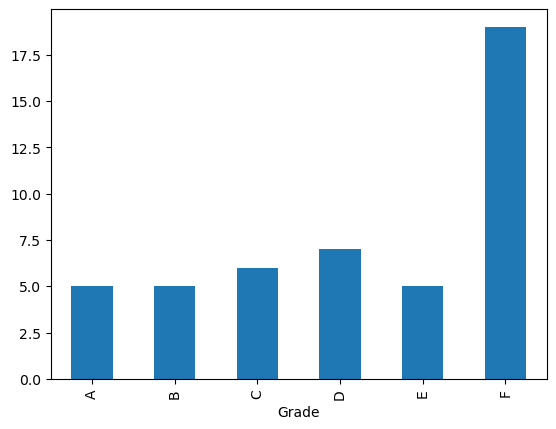

In [65]:
#And plot a barplot of the data

df_gradeCount["FinalGrade"].plot.bar()